Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
library('tidyverse')
install.packages('parsnip')
library(parsnip)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [3]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

In [4]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

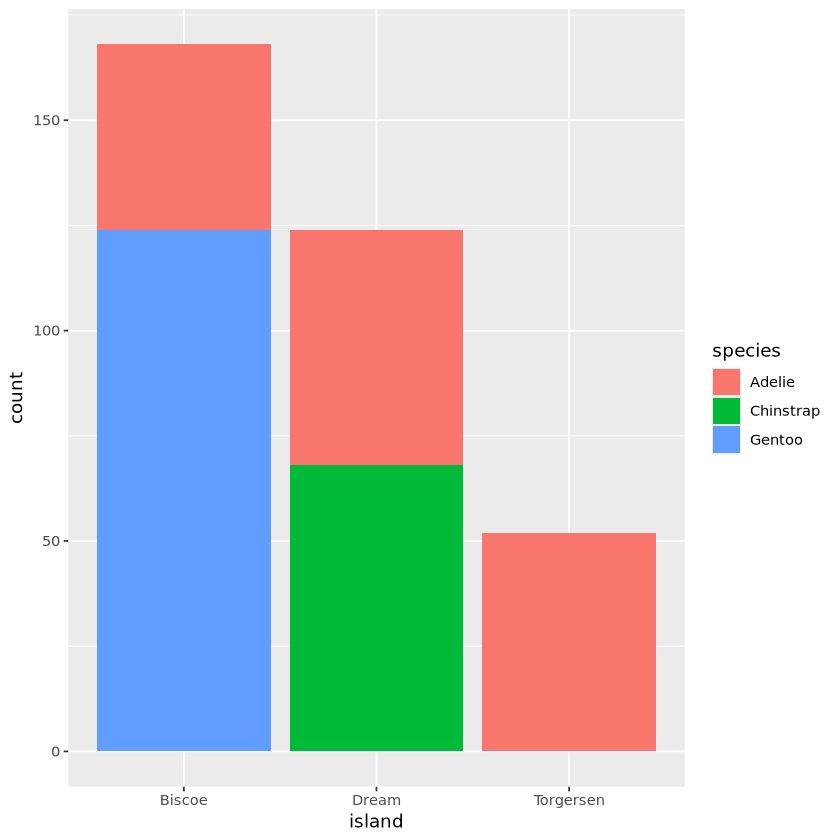

In [6]:
ggplot(data = penguins, aes(x = island, fill = species)) +
  geom_bar()
 

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

The Adelie penguin was observed in all three of the islands.

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


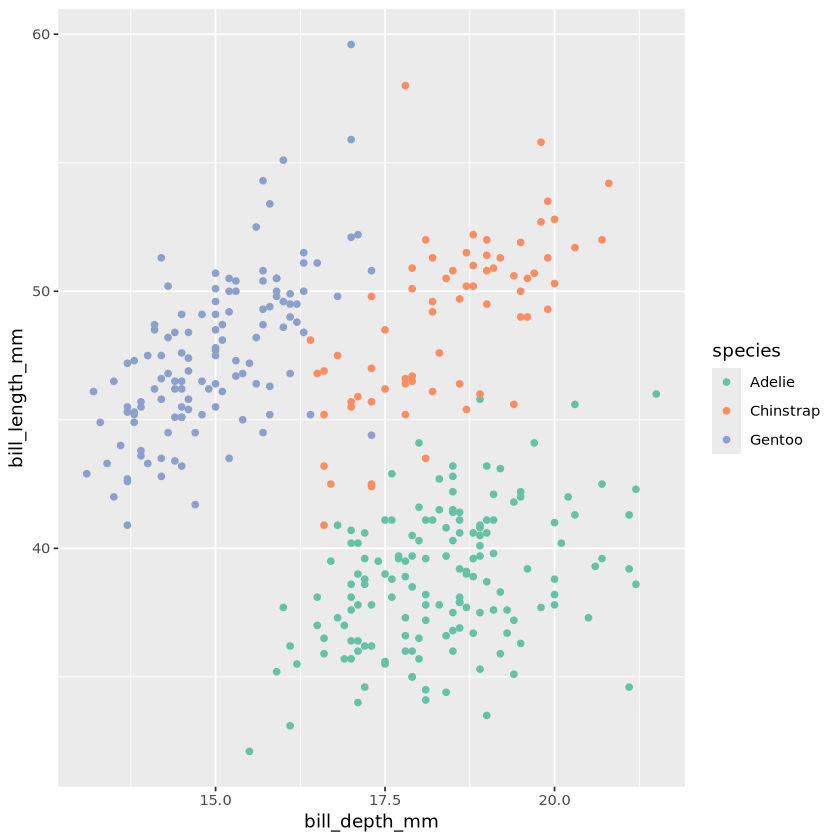

In [14]:
ggplot(data = penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species)) + 
    geom_point() + 
    scale_color_brewer(palette = "Set2")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


<ggproto object: Class FacetWrap, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetWrap, Facet, gg>

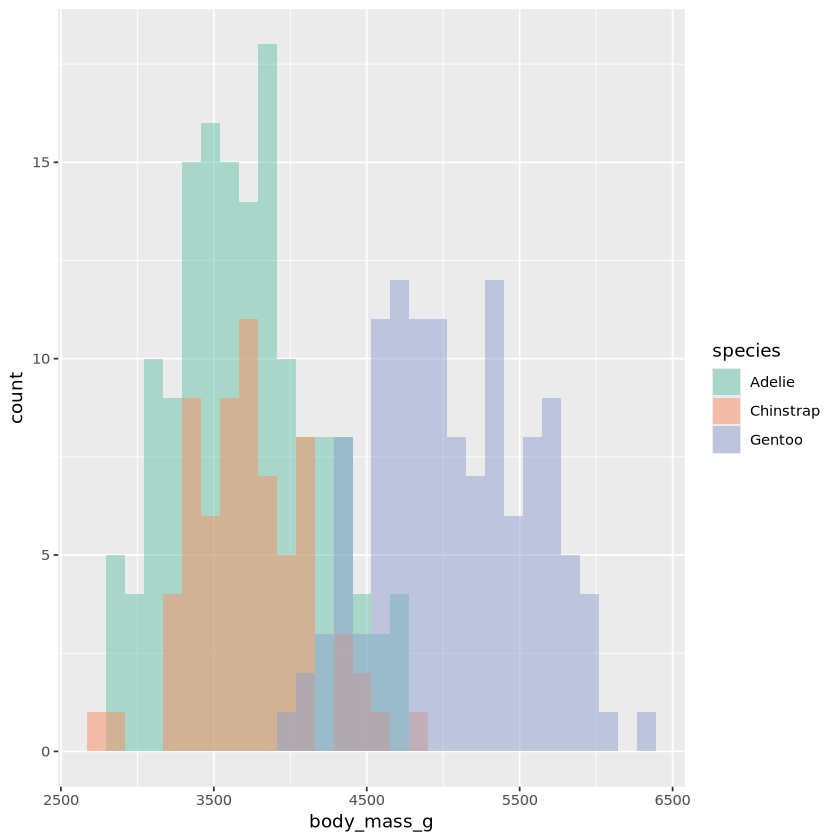

In [25]:
ggplot(data = penguins, aes(x=body_mass_g, fill= species)) +
  geom_histogram(position = "identity", alpha = 0.5) +
  scale_fill_brewer(palette = "Set2") 
  facet_wrap(~sex, ncol = 1) 

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

When position = "identify" is not in the geom_histogram layer, the bars would not be transparent and the values of each bin would be overlapping with different segments, each representing a different species. The position = "identify" argument allows for each histogram to be represented and the actual body mass of each species to be accurately visualized.  

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [26]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [27]:
txhousing = txhousing |> select(-inventory)
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [34]:
dallas_sub = txhousing |> 
    filter(city == "Dallas" & (year == 2012 | year== 2013))

glimpse(dallas_sub)

Rows: 24
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, 3…
$ volume   <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 12090…
$ median   <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 17420…
$ listings <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 15994…
$ date     <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, 2…


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [37]:
dallas_sub = dallas_sub |>  
    mutate(prct_sold = sales/listings * 100)

glimpse(dallas_sub)

Rows: 24
Columns: 9
$ city      <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", …
$ year      <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, …
$ volume    <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 1209…
$ median    <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 1742…
$ listings  <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 1599…
$ date      <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, …
$ prct_sold <dbl> 15.28019, 17.96425, 23.33505, 24.33643, 28.22972, 29.54455, …


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [42]:
dallas_summary = dallas_sub |>
    group_by(month) |>
    summarise(avg_prct_sold = mean(prct_sold))

glimpse(dallas_summary)

Rows: 12
Columns: 2
$ month         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ avg_prct_sold <dbl> 20.54462, 23.47328, 32.24472, 34.46954, 38.20168, 37.191…


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [48]:
dallas_summary = dallas_sub |>
    group_by(month) |>
    summarise(avg_prct_sold = mean(prct_sold)) |>
    slice_max(order_by = avg_prct_sold, n=3)

glimpse(dallas_summary)

Rows: 3
Columns: 2
$ month         <int> 8, 5, 6
$ avg_prct_sold <dbl> 38.51543, 38.20168, 37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [ ]:
txhousing |>
    filter(year == 2012 | year == 2013, city == "Dallas") |>
    mutate(prct_sold = sales/listings *100) |>
    group_by(month) |>
    summarize(mean_prct_sold = mean(prct_sold)) |>
    slice_max(mean_prct_sold, n = 3)

glimpse(txhousing)

This code does essentially is what we did throughout the whole assigmennt in one code chunk rather than broken up.  The pipe filters txhousing data to be just the dallas data from 2012 and 2013. Then it adds a column that is the calculated percentage of sold listings in Dallas.That data is then that data is grouped by month. Once the percentage of listing sold is grouped by month, the average of the data is taken and the top 3 months are given.     